In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pytesseract

In [2]:
#<--------------OPEN AN IMAGE------------------>
im='ten.png'
img=Image.open(im)
print(img)
print(img.size)
#img.show()
#img.rotate(90).show()

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x117 at 0x1138D240E88>
(256, 117)


In [3]:
#<--------------PREPROCESSING OF AN IMAGE------------------>

im='ten.png'
img= cv2.imread(im)

In [4]:
def display(img):
    dpi=80
    im_data=plt.imread(img)
    h,w,d=im_data.shape
    
    figsize=w/float(dpi),h/float(dpi)
    
    fig=plt.figure(figsize=figsize)
    ax=fig.add_axes([0,0,1,1])
    
    ax.axis('off')
    
    ax.imshow(im_data,cmap='gray')
    
    plt.show()
    

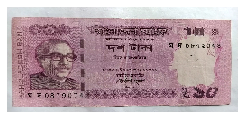

In [5]:
display(im)

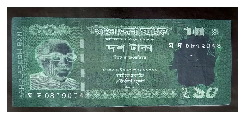

In [6]:
#inverted_image
in_img=cv2.bitwise_not(img)
cv2.imwrite('inverted.png',in_img)
display('inverted.png')

In [7]:
#binarization
def grayscale(image):
    return cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [8]:
gray_img=grayscale(img)
cv2.imwrite('gray.png',gray_img)


True

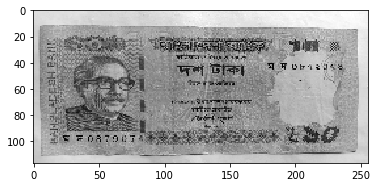

In [9]:

plt.imshow(gray_img,cmap='gray')


In [18]:
img = cv2.medianBlur(gray_img,5)
th2 = cv2.adaptiveThreshold(img,222,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,222,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)


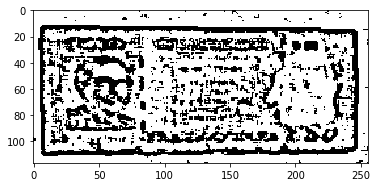

In [19]:
plt.imshow(th3,cmap='gray')

In [23]:
thres,im_bw=cv2.threshold(gray_img,20,200,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
#cv2.imwrite('bw_image.png',im_bw)

#thres,im_bw=cv2.threshold(im_bw,120,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imwrite('bw_image.png',im_bw)


True

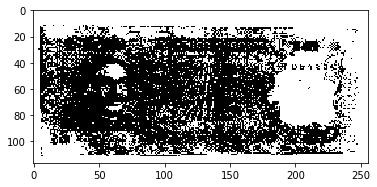

In [24]:
plt.imshow(im_bw,cmap='gray')

In [175]:
#noise removal
def noise_removal(image):
    kernel=np.ones((1,1),np.uint8)
    image = cv2.dilate(image,kernel,iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv2.erode(image,kernel,iterations=1)
    image=cv2.morphologyEx(image,cv2.MORPH_CLOSE,kernel)
    image=cv2.medianBlur(image,3)
    return (image)

In [90]:
no_noise=noise_removal(im_bw)
cv2.imwrite("no_noise.png",no_noise)

True

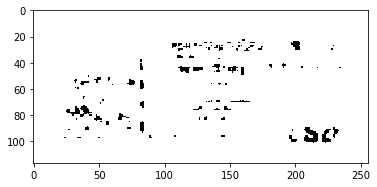

In [91]:
plt.imshow(no_noise,cmap='gray')

In [103]:
#erosion
def thin_font(img):
    import numpy as np
    img=cv2.bitwise_not(img)
    kernel=np.ones((2,2),np.uint8)
    img=cv2.erode(img,kernel,iterations=1)
    img=cv2.bitwise_not(img)
    return (img)

In [104]:
eroded_img=thin_font(im_bw)
cv2.imwrite("eroded_img.png",eroded_img)

True

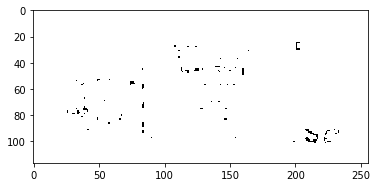

In [105]:
plt.imshow(eroded_img,cmap='gray')

In [182]:
#dilation
def thick_font(img):
    import numpy as np
    img=cv2.bitwise_not(img)
    kernel=np.ones((2,2),np.uint8)
    img=cv2.erode(img,kernel,iterations=1)
    img=cv2.dilate(img,kernel,iterations=1)
    
    
    img=cv2.bitwise_not(img)
    return (img)

In [183]:
dilated_img=thick_font(im_bw)
cv2.imwrite("dilated_img.png",dilated_img)

True

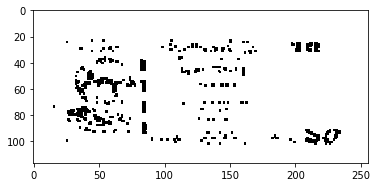

In [184]:
plt.imshow(dilated_img,cmap='gray')